In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
x,y = make_circles(n_samples=100, noise=0.1, random_state=1)
x.shape,y.shape

((100, 2), (100,))

In [3]:
import seaborn as sns

<AxesSubplot: >

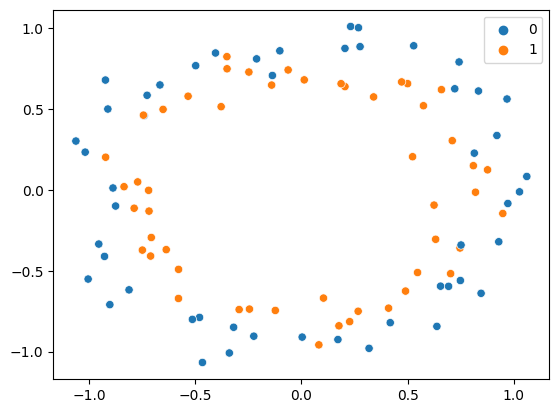

In [4]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=2)
x_train.shape,x_test.shape

((80, 2), (20, 2))

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
callback = EarlyStopping(
monitor='val_loss',
min_delta=0.0001,
patience=10,
verbose=1,
mode='auto',
baseline=None,
restore_best_weights=False)

In [10]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=300,callbacks=callback)

Epoch 1/300
3/3 [==============================] - 1s 121ms/step - loss: 0.6898 - accuracy: 0.5625 - val_loss: 0.7083 - val_accuracy: 0.4000
Epoch 2/300
3/3 [==============================] - 0s 18ms/step - loss: 0.6880 - accuracy: 0.5625 - val_loss: 0.7102 - val_accuracy: 0.4500
Epoch 3/300
3/3 [==============================] - 0s 19ms/step - loss: 0.6869 - accuracy: 0.5500 - val_loss: 0.7114 - val_accuracy: 0.4500
Epoch 4/300
3/3 [==============================] - 0s 18ms/step - loss: 0.6859 - accuracy: 0.5500 - val_loss: 0.7117 - val_accuracy: 0.4500
Epoch 5/300
3/3 [==============================] - 0s 17ms/step - loss: 0.6851 - accuracy: 0.5500 - val_loss: 0.7135 - val_accuracy: 0.4500
Epoch 6/300
3/3 [==============================] - 0s 18ms/step - loss: 0.6844 - accuracy: 0.5625 - val_loss: 0.7154 - val_accuracy: 0.4500
Epoch 7/300
3/3 [==============================] - 0s 18ms/step - loss: 0.6837 - accuracy: 0.5500 - val_loss: 0.7167 - val_accuracy: 0.4500
Epoch 8/300
3/3 [==

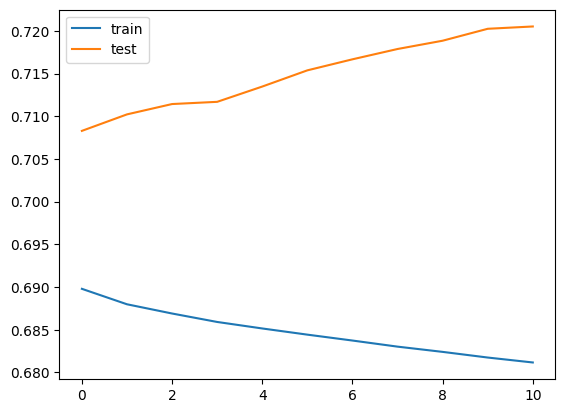

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()